<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




# Primary question solution

Notice that in 3D space, the image of $\phi$ creates a 2D manifold inside 3D space:
$$
\mathcal{M} = \{(x_1^2, \sqrt{2}x_1x_2, x_2^2) : (x_1, x_2) \in \mathbb{R}^2\}
$$

So, the circle we see on the visualization is the intersection of the proper hyperplane with $\mathcal{M}$.

Let's plot $\mathcal{M}$ and the plot with datapoints and boundary to see it:

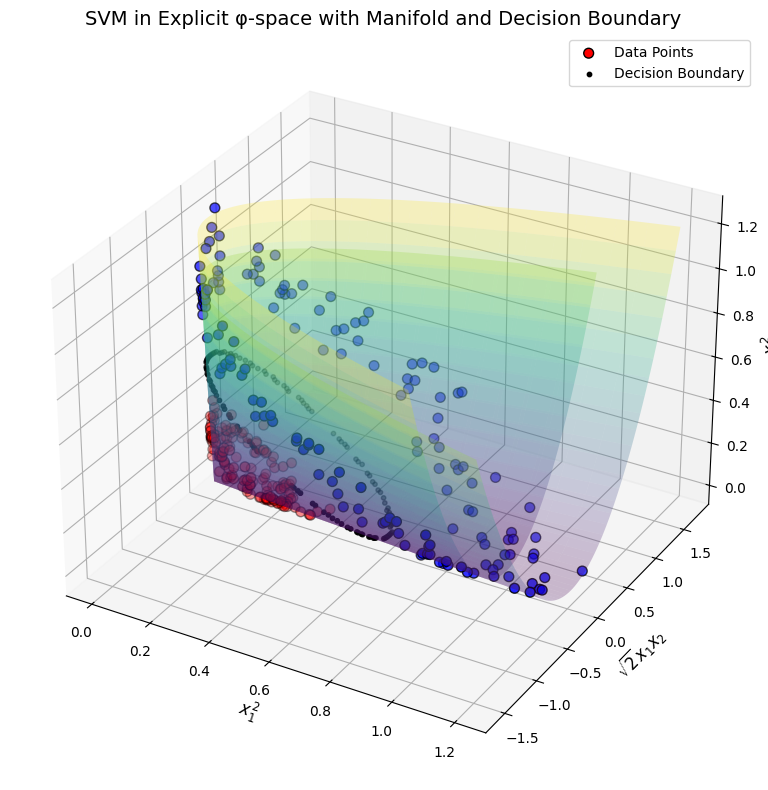

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)


y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, coef0=0 to match φ(x) explicitly)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
clf.fit(X, y)

# 3. Generate meshgrid in input space for evaluating decision function
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                     np.linspace(y_min, y_max, 150))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(grid)

# Apply explicit φ(x) = [x1^2, √2 x1 x2, x2^2]
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])
phi_grid = np.array(phi_grid)

# Keep only points close to decision boundary (for visualizing the "hyperplane")
boundary_mask = np.abs(Z) < 0.02
boundary_points = phi_grid[boundary_mask]

# Transform training data to φ-space
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# 4. Create 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D manifold (surface of all φ(x) values)
x1_vals = np.linspace(-1.1, 1, 100)
x2_vals = np.linspace(-1.1, 1, 100)
X1_grid, X2_grid = np.meshgrid(x1_vals, x2_vals)
Z1 = X1_grid**2
Z2 = np.sqrt(2) * X1_grid * X2_grid
Z3 = X2_grid**2

ax.plot_surface(Z1, Z2, Z3, cmap='viridis', alpha=0.25, edgecolor='none')

# Plot transformed data points
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, label='Data Points')

# Plot decision boundary in φ-space (points where decision function ≈ 0)
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], boundary_points[:, 2],
           c='black', s=10, label='Decision Boundary')

# Labels and Title
ax.set_xlabel('$x_1^2$', fontsize=12)
ax.set_ylabel('$\\sqrt{2} x_1 x_2$', fontsize=12)
ax.set_zlabel('$x_2^2$', fontsize=12)
ax.set_title('SVM in Explicit φ-space with Manifold and Decision Boundary', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()


# Secondary question answer

For this question, we have to notice that SVM learns parameters $\omega_1, \omega_2, \omega_3, b$ and the 
decision hyperplane in $\mathbb{R}^3$ is given by the equation:

$$
\omega_1x +\omega_2y +\omega_3z +b = 0
$$

But our datapoints live on the manifold $\mathcal{M}$. Hence the boundary fullfils:
$$
\omega_1x_1^2 +\omega_2\sqrt{2}x_1x_2 +\omega_3x_2^2 +b = 0
$$

Which is a representation of some conic curve in $\mathbb{R^2}$